## Business Case Analysis:

Create a predictive model which will help to repeat blood donations amongst donors based on a limited number of attributes

## Domain Analysis

#### Overview

Blood donation is a voluntary procedure that can help save lives. There are several types of blood donation. Each type helps meet different medical needs.

#### Risks

Blood donation is safe. New, sterile disposable equipment is used for each donor, so there's no risk of getting a bloodborne infection by donating blood.

Most healthy adults can donate a pint (about half a liter) safely, without health risks. Within a few days of a blood donation, your body replaces the lost fluids. And after two weeks, your body replaces the lost red blood cells.

#### Eligibility requirements

To be eligible to donate whole blood, plasma or platelets, you must be:

In good health.
At least 16 or 17 years old, depending on the law in your state. Some states allow legal minors to donate with parent permission. While there's no legal upper age limit, policies may vary between individual donor centers.
At least 110 pounds (about 50 kilograms).
Able to pass the physical and health-history assessments.
Eligibility requirements differ slightly among different types of blood donation.

Before your blood donation:

Get plenty of sleep the night before you plan to donate.
Eat a healthy meal before your donation. Avoid fatty foods, such as a hamburger, fries or ice cream.
Drink plenty of water before the donation.
Check to see if any medications you are taking or recently took would prevent you from donating. For example, if you are a platelet donor, you must not take aspirin for two days prior to donating. Talk to a member of your health care team before you stop taking any medications in order to donate blood.
Wear a shirt with sleeves that can be rolled up.

Before you can donate blood, you will be asked to fill out a confidential medical history. It includes questions about behaviors known to carry a higher risk of bloodborne infections — infections that are transmitted through blood.

Because of the risk of bloodborne infections, not everyone can donate blood. The following are groups that are not eligible to donate blood:

Anyone who has used injected drugs, steroids or another substance not prescribed by a health care provider in the past three months
Anyone who has had a new sexual partner in the past three months and has had anal sex in the past three months
Anyone who has had multiple sexual partners in the past three months and has had anal sex in the past three months
Anyone who has a congenital coagulation factor deficiency
Anyone who has had a positive test for HIV
Anyone who has engaged in sex for money or drugs in the past three months
Anyone who, in the past three months, has had close contact with — lived with or had sexual contact with — a person who has hepatitis B or hepatitis C
Anyone who has had babesiosis, a rare and severe tick-borne disease, in the past two years

The virus that causes coronavirus disease 2019 (COVID-19) hasn't been shown to be transmitted through blood transfusions. However, the U.S. Food and Drug Administration suggests waiting to donate blood for at least 10 days after a positive diagnostic test for COVID-19 without symptoms or for at least 10 days after symptoms of COVID-19 have completely gone away.

Those who have tested positive for COVID-19 antibodies but didn't have a diagnostic test and never developed symptoms can donate without a waiting period or having a diagnostic test done before donation.

After donating, you sit in an observation area, where you rest and eat a light snack. After 15 minutes, you can leave. After your blood donation:

Drink extra fluids.
Avoid strenuous physical activity or heavy lifting for about 24 hours.
If you feel lightheaded, lie down with your feet up until the feeling passes.
Keep your bandage on and dry for the next four hours.
If you have bleeding after removing the bandage, put pressure on the site and raise your arm until the bleeding stops.
If bruising occurs, apply a cold pack to the area periodically during the first 24 hours.
Consider adding iron-rich foods to your diet to replace the iron lost with blood donation.

## Dataset description

1.Unnamed:0 :This column represents the donor's unique ID.
2.Months since Last Donation :This is the number of months since this donor’s most recent donation.
3.Number of Donations :This is the total number of donations that the donor has made.
4.Total Volume Donated (c.c.) :This is the total amount of blood that the donor has donated in cubic centimetres.
5.Months since First Donation :This is the number of months since the donor’s first donation.

6.Made Donation in March 2007 :(target variable)
A binary variable representing whether he/she donated blood in March 2007 (1 stands for donating blood; 0 stands for not donating blood)

## Import Libraries and Load the Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data import & pre-processing
import numpy as np 
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier


# cross validation
from sklearn.model_selection import cross_val_score

# Model evaluation metrics

from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_auc_score,log_loss,recall_score,precision_score, confusion_matrix


In [2]:
df=pd.read_csv('Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv',delimiter=",")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
pd.set_option('display.max_rows',None)

## EDA(Exploratory Data Analysis)

#### Basic checks

In [5]:
df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [6]:
df.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [7]:
df.shape

(576, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [9]:
df.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


### Univariant analysis

In [10]:
# Rename columns 'whether he/she donated blood in March 2007
# as'target' column 

df.rename(columns={
             'Months since Last Donation':'Months_LastDonation',
             'Number of Donations':'Total_Donations',
             'Total Volume Donated (c.c.)':'Total_volumeDonation',
             'Months since First Donation':'Months_FirstDonation',
             'Made Donation in March 2007': 'target'},inplace=True)

df.head()

,Unnamed: 0,Months_LastDonation,Total_Donations,Total_volumeDonation,Months_FirstDonation,target
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


#### Distribution of target variable

In [11]:
df.target.value_counts()

target
0    438
1    138
Name: count, dtype: int64

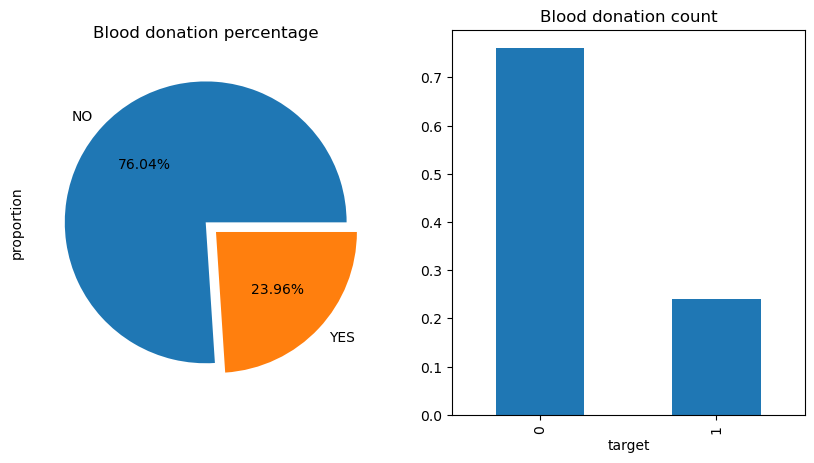

In [12]:
fig, ax = plt.subplots(ncols= 2,figsize=(10,5))

df.target.value_counts(normalize=True).plot.pie(autopct = "%0.2f%%",explode = [0,0.1], labels=['NO','YES'],ax=ax[0])

ax[0].set_title('Blood donation percentage')

df.target.value_counts(normalize=True).plot(kind='bar',ax=ax[1])

ax[1].set_title('Blood donation count')

plt.show() # To show pie chart only

From above plot we are clearly seen that 76% have no donated blood data and 24% have blood donated data. This target variable is imbalance so we need to balance the data with the help of oversampling.

In [13]:
df.columns

Index(['Unnamed: 0', 'Months_LastDonation', 'Total_Donations',
       'Total_volumeDonation', 'Months_FirstDonation', 'target'],
      dtype='object')

In [14]:
df_num= df[['Months_LastDonation','Total_Donations','Total_volumeDonation','Months_FirstDonation']]

In [15]:
df_num

,Months_LastDonation,Total_Donations,Total_volumeDonation,Months_FirstDonation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
5,4,4,1000,4
6,2,7,1750,14
7,1,12,3000,35
8,5,46,11500,98
9,0,3,750,4


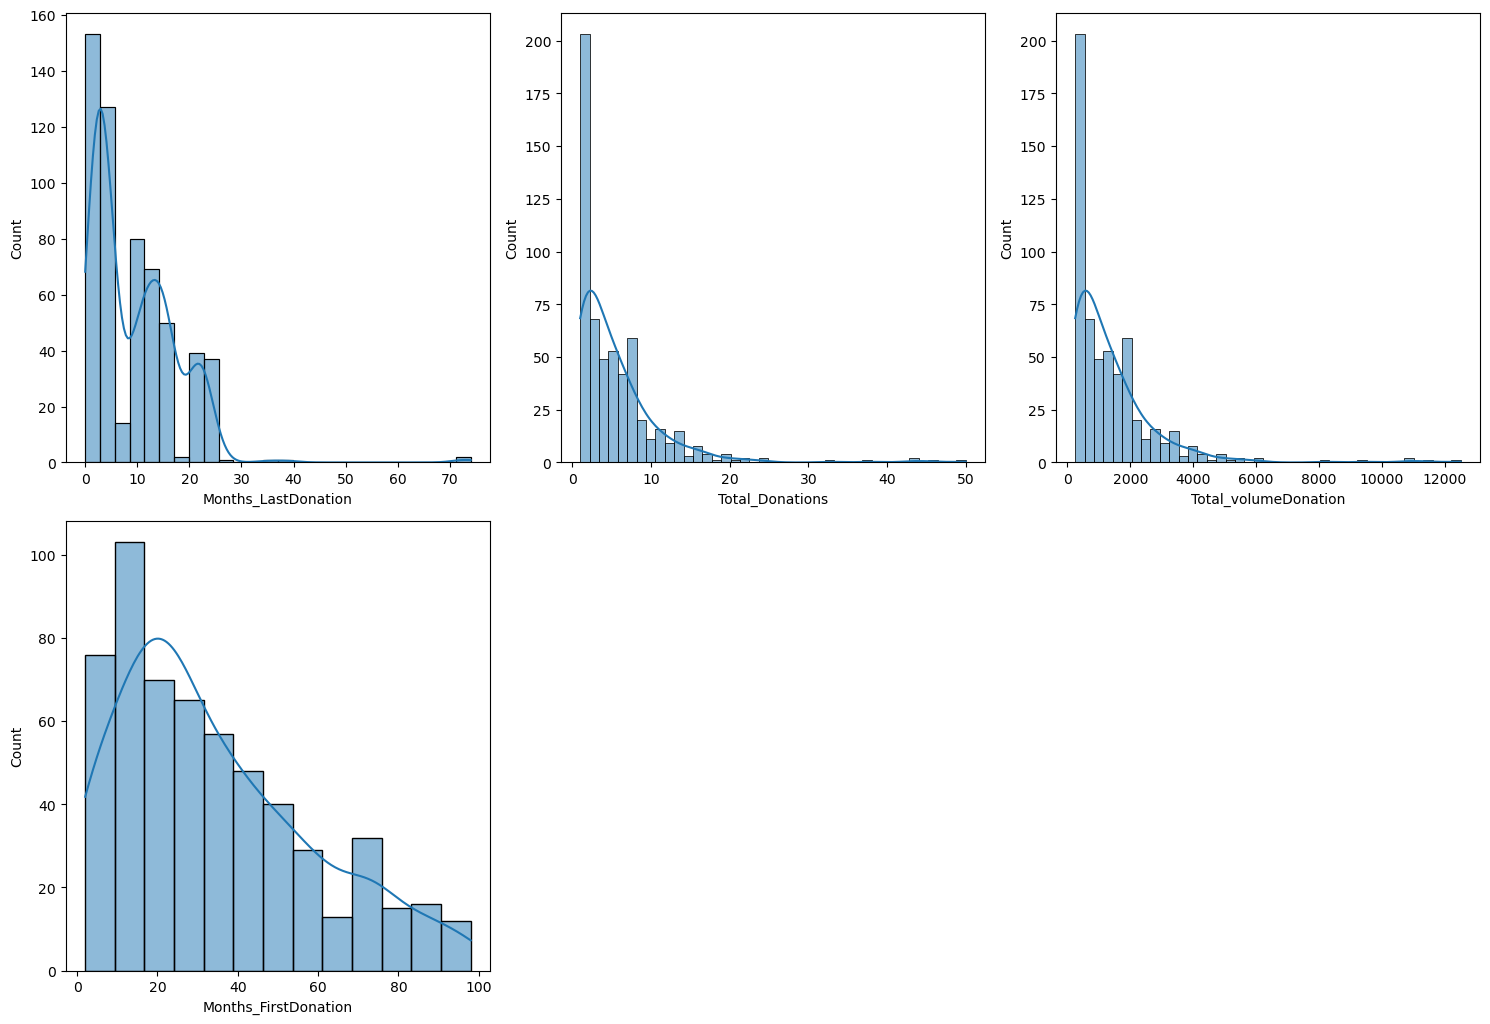

In [16]:
## Numerical univariant analysis

plt.figure(figsize=(15,15)) # Canvase size
plotnumber = 1
for i in df_num:
    plt.subplot(3, 3, plotnumber)
    sns.histplot(x = df_num[i],kde = True)
    plotnumber = plotnumber+1
plt.tight_layout()

Most of the Months since Last Donation	range between 0 to 25 months
Most of the Number of Donations	range between 0 to 20 times
The range of the Months since first Donation is 0 to 90
he range of the Total Volume Donated is 250 to 4000 c.c

### Bi-Variant analysis

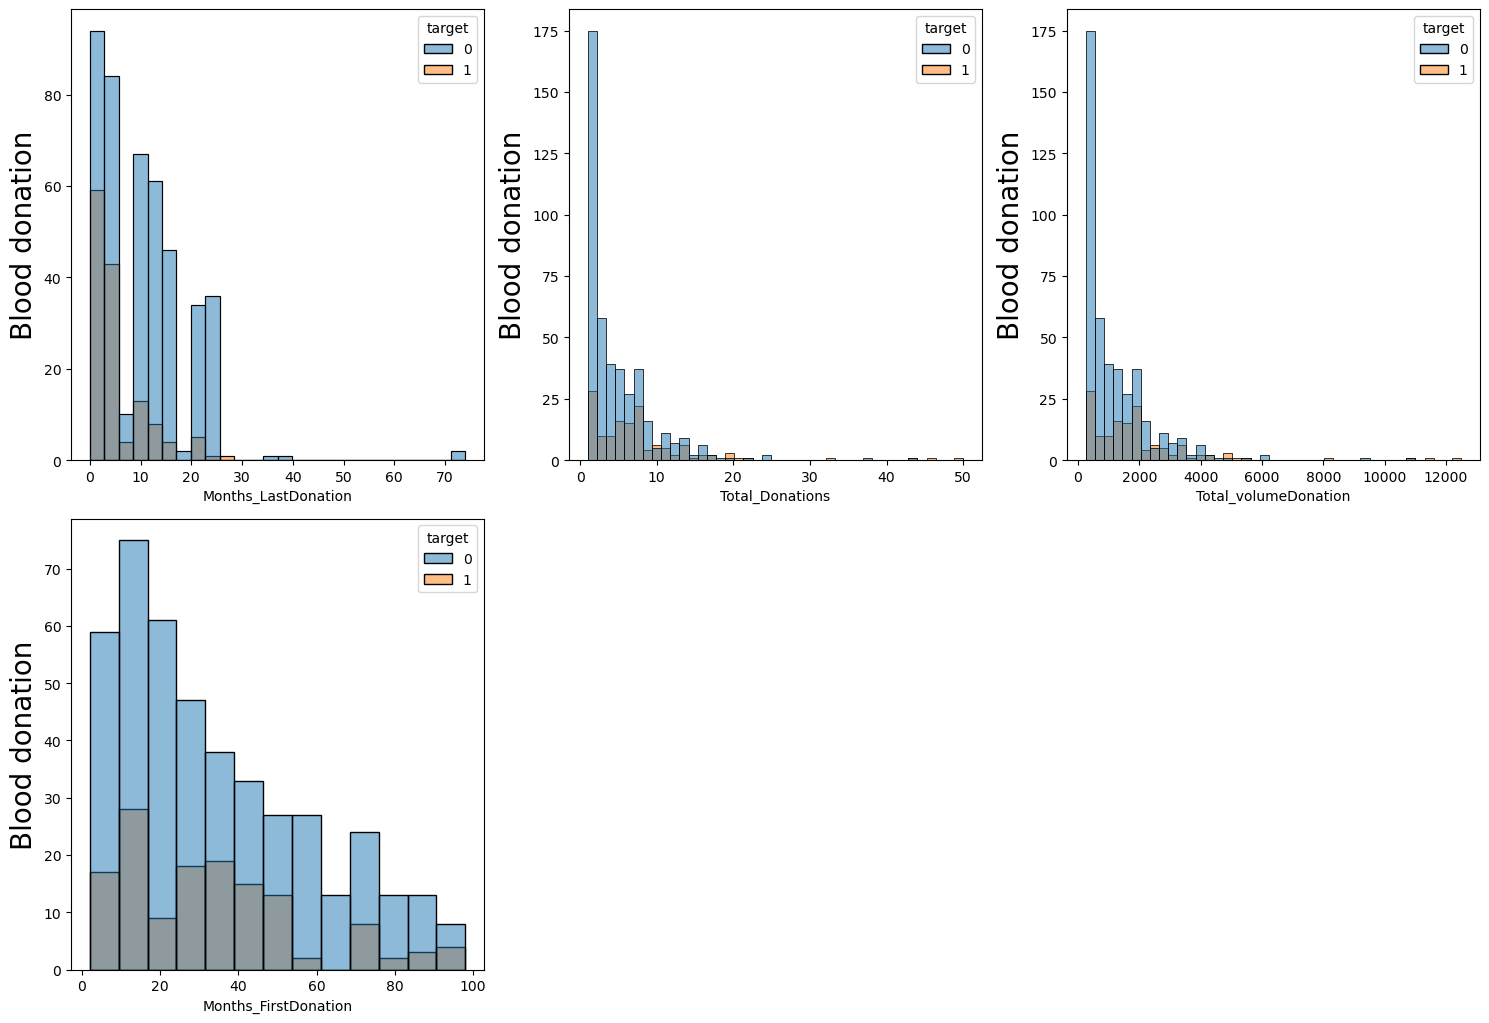

In [17]:
plt.figure(figsize=(15,15))
plotnumber = 1
for i in df_num:
    plt.subplot(3, 3, plotnumber)
    sns.histplot(x = df_num[i], hue = df.target)
    plt.ylabel('Blood donation',fontsize=20)
    plotnumber = plotnumber+1
plt.tight_layout()

## Data Preprocissing

#### Handling with null values

In [18]:
df.isnull().sum()

Unnamed: 0              0
Months_LastDonation     0
Total_Donations         0
Total_volumeDonation    0
Months_FirstDonation    0
target                  0
dtype: int64

In [19]:
null=df.isnull().sum()
perc=df.isnull().sum()/df.shape[0]*100
null_perc=pd.concat([null,perc],axis=1,keys=['Missing Number','Missing Percentage'])
null_perc

,Missing Number,Missing Percentage
Unnamed: 0,0,0.0
Months_LastDonation,0,0.0
Total_Donations,0,0.0
Total_volumeDonation,0,0.0
Months_FirstDonation,0,0.0
target,0,0.0


No null values in data

In [20]:
df.duplicated().sum()

0

#### Handling outliers

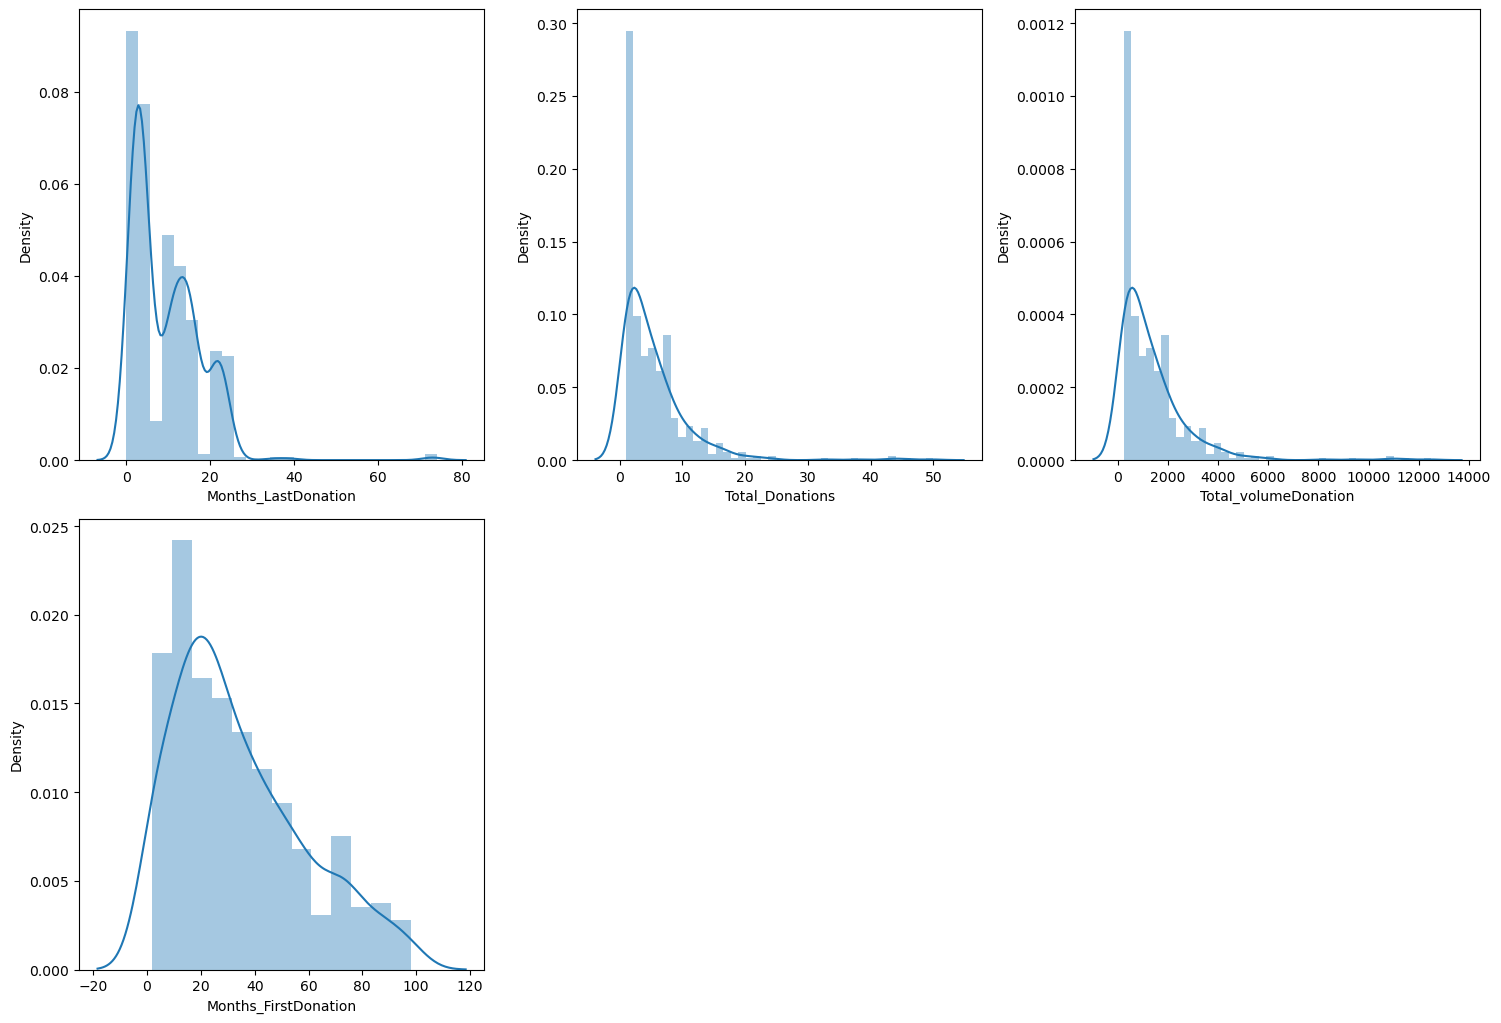

In [21]:
## Check distribution of data

plt.figure(figsize=(15,15))
plotnumber = 1
for i in df_num:
    plt.subplot(3, 3, plotnumber)
    sns.distplot(x = df_num[i],kde = True)
    plt.xlabel(i,fontsize=10)
    plotnumber = plotnumber+1
plt.tight_layout()

None of the column is normally distributed. Distribution of Number of Donations and Total Volume Donated  is right skewed.s

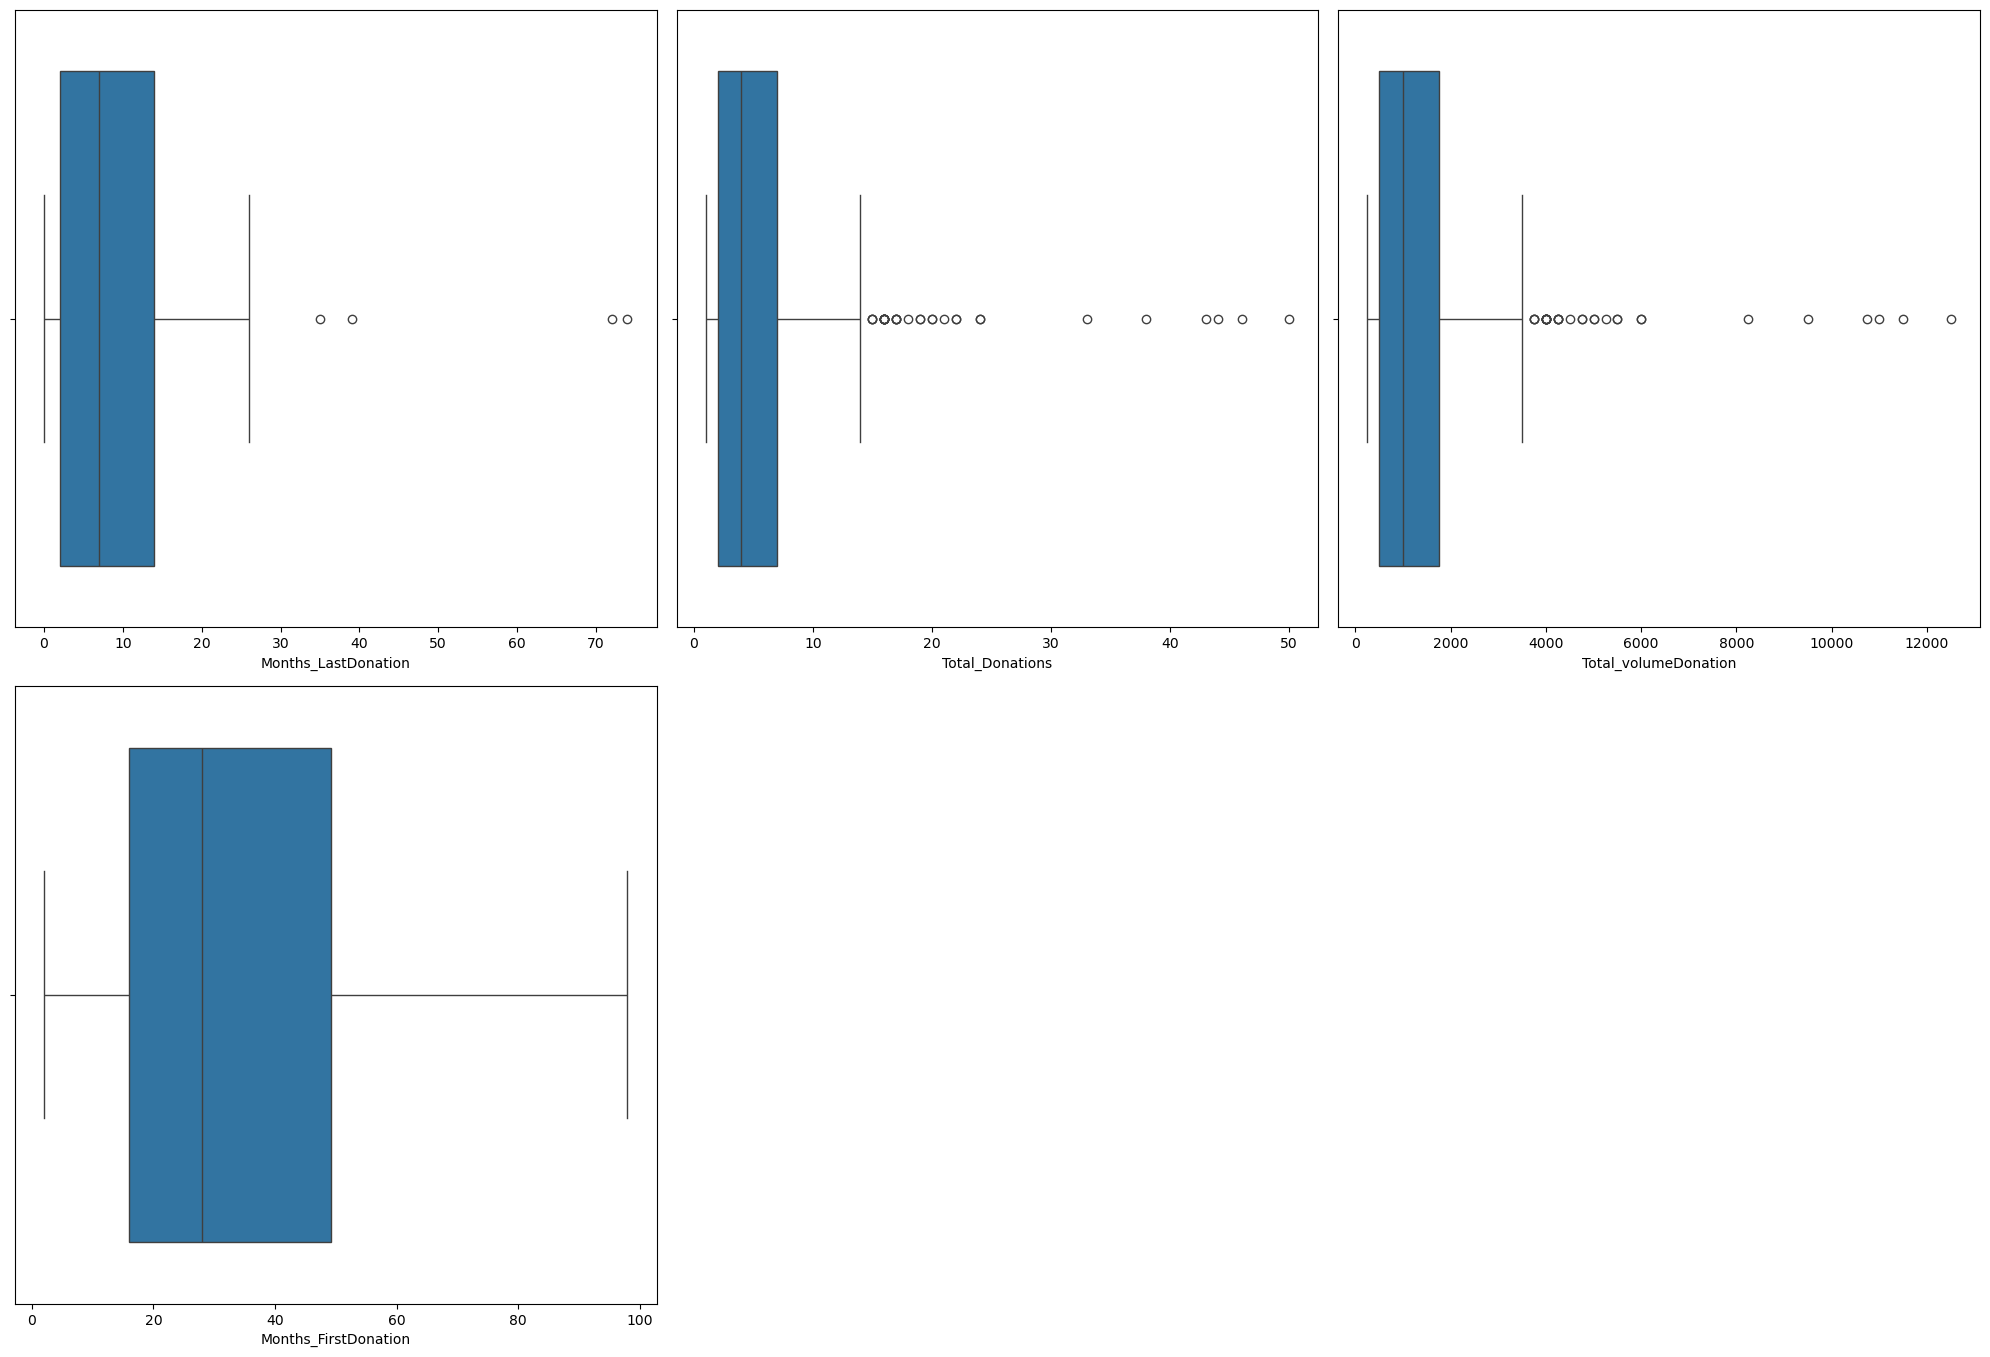

In [22]:
# check outliers with boxplot
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in df_num:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x=df_num[i])
    plotnumber=plotnumber+1
plt.tight_layout()

In [23]:
len(df.loc[df['Months_LastDonation']>=32])/len(df)

0.006944444444444444

In [24]:
len(df.loc[df['Total_Donations']>=14.5])/len(df)

0.05381944444444445

In [25]:
len(df.loc[df['Total_volumeDonation']>=3625])/len(df)

0.05381944444444445

In [26]:
def wisker(columns):
    q1,q3=np.percentile(columns,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [27]:
lw,uw=wisker(df.Months_LastDonation)

In [28]:
print(lw,uw)

-16.0 32.0


In [29]:
lw,uw=wisker(df.Total_Donations)

In [30]:
print(lw,uw)

-5.5 14.5


In [31]:
lw,uw=wisker(df.Total_volumeDonation)

In [32]:
print(lw,uw)

-1375.0 3625.0


In [33]:
np.median(df.Months_LastDonation)

7.0

In [34]:
np.median(df.Total_Donations)

4.0

In [35]:
np.median(df.Total_volumeDonation)

1000.0

In [36]:
df.loc[df.Months_LastDonation >=32,'Months_LastDonation']=np.median(df.Months_LastDonation)

In [37]:
df.loc[df.Total_Donations >=14.5,'Total_Donations']=np.median(df.Total_Donations)

In [38]:
df.loc[df.Total_volumeDonation >=3625,'Total_volumeDonation']=np.median(df.Total_volumeDonation)

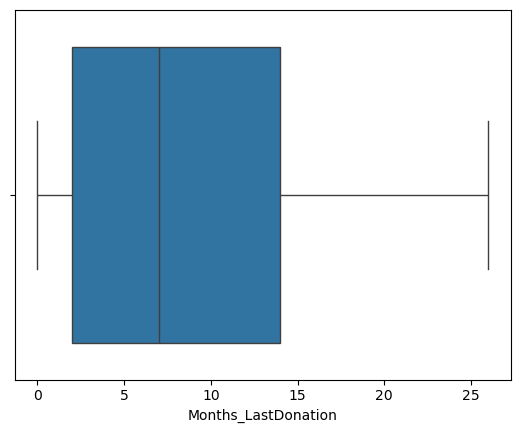

In [39]:
sns.boxplot(x=df.Months_LastDonation) #boxplot after outlier treatment
plt.show()

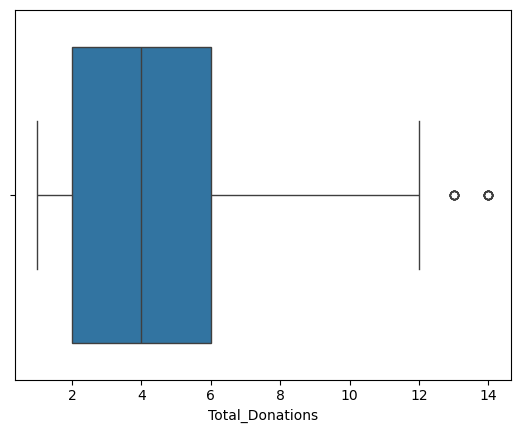

In [40]:
sns.boxplot(x=df.Total_Donations) #boxplot after outlier treatment
plt.show()

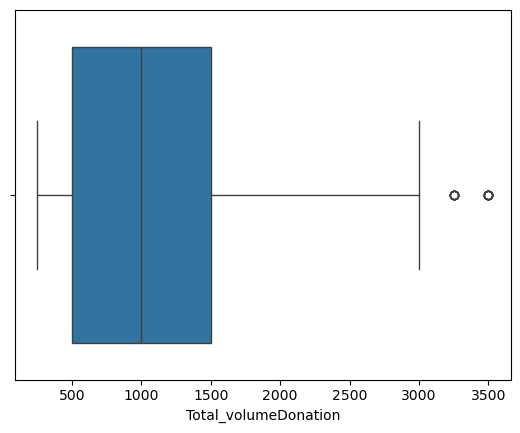

In [41]:
sns.boxplot(x=df.Total_volumeDonation) #boxplot after outlier treatment
plt.show()

### Encoading

There is no categorical feature to encoading

## Feature selection

In [42]:
df.drop('Unnamed: 0',axis=1,inplace=True)

#### Checking correlation

In [43]:
df.corr()

,Months_LastDonation,Total_Donations,Total_volumeDonation,Months_FirstDonation,target
Months_LastDonation,1.000000,-0.184635,-0.184635,0.153669,-0.275395
Total_Donations,-0.184635,1.000000,1.000000,0.518697,0.191408
Total_volumeDonation,-0.184635,1.000000,1.000000,0.518697,0.191408
Months_FirstDonation,0.153669,0.518697,0.518697,1.000000,-0.019819
target,-0.275395,0.191408,0.191408,-0.019819,1.000000


<Axes: >

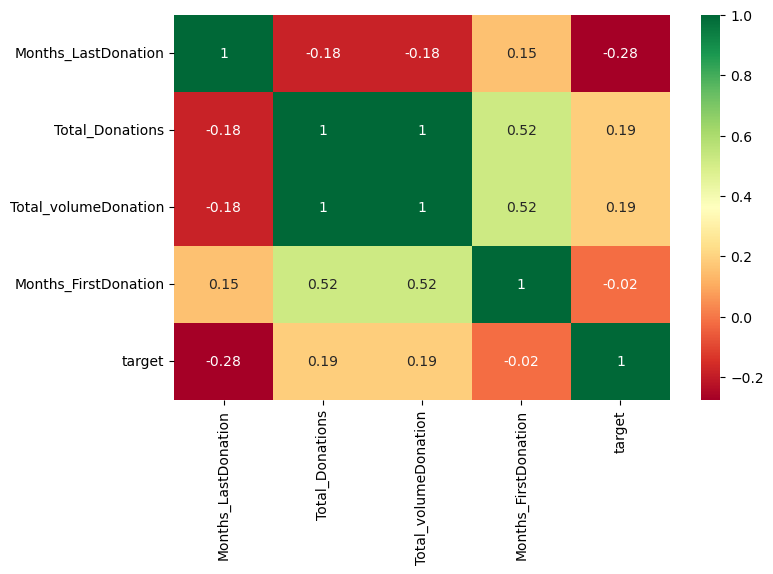

In [44]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True , cmap='RdYlGn')

In [45]:
 #To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = df.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr
0,Total_Donations,Total_volumeDonation,1.0
1,Total_volumeDonation,Total_Donations,1.0


Total_Donations and Total_volumeDonation are highly correlated each one can remove one of them

In [46]:
df.drop(['Total_Donations'],axis=1,inplace=True)

## Model Creation

In [47]:
x=df.drop('target', axis=1)
y= df.target

#### Balancing

In [48]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
x_sm,y_sm = sm.fit_resample(x,y)
print("balanced data:    :",Counter(y_sm))


unbalanced data   :   Counter({0: 438, 1: 138})
balanced data:    : Counter({1: 438, 0: 438})


#### Train Test Split

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split (x, y, test_size=0.20, random_state=18)

In [51]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
target
1    353
0    347
Name: count, dtype: int64
Distribution of traget variable in test set
target
0    91
1    85
Name: count, dtype: int64


In [52]:
## training and testing data shape

print('------------Training Set------------------')
print(x_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(x_test.shape)
print(y_test.shape)

------------Training Set------------------
(700, 3)
(700,)
------------Test Set------------------
(176, 3)
(176,)


#### Scalling(feature normalization)

In [53]:
df.columns

Index(['Months_LastDonation', 'Total_volumeDonation', 'Months_FirstDonation',
       'target'],
      dtype='object')

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
ms=MinMaxScaler()

In [56]:
#scalling train data
x_train[['Months_LastDonation','Total_volumeDonation','Months_FirstDonation']]=ms.fit_transform(x_train[['Months_LastDonation','Total_volumeDonation','Months_FirstDonation']])
x_train.head()

,Months_LastDonation,Total_volumeDonation,Months_FirstDonation
376,0.884615,0.000000,0.218750
455,0.346154,0.769231,0.489583
610,0.153846,0.230769,0.250000
1,0.000000,0.923077,0.270833
26,0.153846,0.692308,0.270833


In [57]:
#scalling test data
x_test[['Months_LastDonation','Total_volumeDonation','Months_FirstDonation']]=ms.transform(x_test[['Months_LastDonation','Total_volumeDonation','Months_FirstDonation']])
x_test.head()

,Months_LastDonation,Total_volumeDonation,Months_FirstDonation
239,0.173913,0.317561,0.750000
630,0.086957,0.238171,0.177083
371,1.000000,0.000000,0.218750
430,0.130435,0.555732,0.500000
259,0.478261,0.158781,0.270833


### Model fitting

## 1 LOGISTIC REGRESSION(LR)

In [58]:
#Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation 
LR = LogisticRegression()

# Step:3 fitting traing data
LR.fit(x_train,y_train)

# Step:4 Prediction on training data
LR_train_pred = LR.predict(x_train)

# Step:5 Prediction on test data
LR_test_pred = LR.predict(x_test)


#### Evaluation of logostic regression

#### Training accuracy of LR

In [59]:
lr_train_acc=accuracy_score(LR_train_pred,y_train)
print('Training accuracy of Logistic regression',lr_train_acc*100)
print('Logistic regression training Classification report: \n',classification_report(LR_train_pred,y_train))

Training accuracy of Logistic regression 66.0
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.57      0.69      0.62       285
           1       0.75      0.64      0.69       415

    accuracy                           0.66       700
   macro avg       0.66      0.66      0.66       700
weighted avg       0.68      0.66      0.66       700



#### Testing accuracy of LR

In [60]:
lr_test_accuracy = accuracy_score(LR_test_pred,y_test)
print("testing accuracy of Logistic regression model",lr_test_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(LR_test_pred,y_test))

testing accuracy of Logistic regression model 66.47727272727273
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.59      0.71      0.65        76
           1       0.74      0.63      0.68       100

    accuracy                           0.66       176
   macro avg       0.67      0.67      0.66       176
weighted avg       0.68      0.66      0.67       176



In [61]:
# In medical domain recall score is more important
lr_recal = recall_score(LR_test_pred,y_test)
lr_recal*100

63.0

In [62]:
# crosstab of logistic regression
pd.crosstab(LR_test_pred,y_test)

target,0,1
row_0,,
0,54,22
1,37,63


#### Cross validation of LR

In [63]:
# Step:1 Create logistic regression object
LR1 = LogisticRegression()
# Step:2 importing library
scores = cross_val_score(LR1, x_sm, y_sm, scoring='f1', cv = 5)
scores

array([0.56540084, 0.66666667, 0.88607595, 0.67619048, 0.77631579])

In [64]:
print('mean score ',scores.mean())
print('satandard deviation',scores.std())

mean score  0.7141299451159544
satandard deviation 0.1088531297426209


#### Baging of Logistic Regression

In [65]:
# Step:1 Create logistic regression object
LR_bag = LogisticRegression()

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier

bagg = BaggingClassifier(base_estimator=LR_bag,n_estimators=20)
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners
# Step:3 Fitting the training data
bagg.fit(x_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(x_test)

In [66]:
# Evauluation score after baging
bag_acc=accuracy_score(bagg_predict,y_test)
print('Testing accuracy after baging',bag_acc*100)

Testing accuracy after baging 65.9090909090909


## 2.KNeighborsClassifier(KNN)

In [136]:
 # Step:1 Taking the optimal value of k
from sklearn.neighbors import KNeighborsClassifier

error_rate = []   # Creating empty list

for i in range(1, 11):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train, y_train)
    y_pred_knn = KNN.predict(x_test)
    error_rate.append(np.mean(y_pred_knn != y_test))
print("Error rate:",error_rate)   

Error rate: [0.3068181818181818, 0.32386363636363635, 0.2727272727272727, 0.30113636363636365, 0.2897727272727273, 0.2727272727272727, 0.3181818181818182, 0.29545454545454547, 0.30113636363636365, 0.3068181818181818]


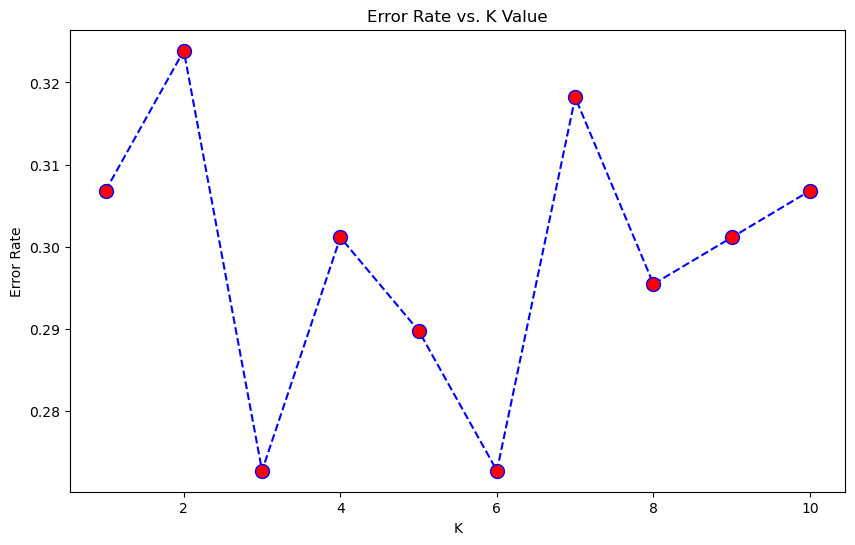

In [68]:
# Step:2 Plotting the error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [137]:
# Step:3 Get nearst neighbors
KNN2 = KNeighborsClassifier(n_neighbors=9)

# Step:4 Fitting the training data
KNN2.fit(x_train,y_train)


# Step:5 Prediction on training data
KNN_train_pred = KNN2.predict(x_train)

# Step:6 Prediction on testing data
KNN_test_pred = KNN2.predict(x_test)

#### Evaluation of KNN

#### Training accuracy of KNN

In [138]:
knn_train_acc=accuracy_score(KNN_train_pred,y_train)
print('Training accuracy of KNN',knn_train_acc*100)
print('Training classification report:\n',classification_report(KNN_train_pred,y_train))

Training accuracy of KNN 77.71428571428571
Training classification report:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76       301
           1       0.84      0.75      0.79       399

    accuracy                           0.78       700
   macro avg       0.78      0.78      0.78       700
weighted avg       0.79      0.78      0.78       700



#### Testing accuracy of KNN

In [139]:
knn_test_acc=accuracy_score(KNN_test_pred,y_test)
print('Testing accuraco of KNN',knn_test_acc*100)
print('Testing classification report:\n',classification_report(KNN_test_pred,y_test))

Testing accuraco of KNN 69.88636363636364
Testing classification report:
               precision    recall  f1-score   support

           0       0.62      0.76      0.68        74
           1       0.79      0.66      0.72       102

    accuracy                           0.70       176
   macro avg       0.70      0.71      0.70       176
weighted avg       0.72      0.70      0.70       176



In [141]:
# In medical domain recall score is more important
knn_recal = recall_score(KNN_test_pred,y_test)
knn_recal*100

65.68627450980392

In [140]:
# Cross tab
pd.crosstab(KNN_test_pred,y_test)

target,0,1
row_0,,
0,56,18
1,35,67


#### Bagging of KNN

In [74]:
# Step:1 Create  KNeighborsClassifier object
KNN_bag = KNeighborsClassifier()

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier

bagg = BaggingClassifier(base_estimator=KNN_bag,n_estimators=20)
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners
# Step:3 Fitting the training data
bagg.fit(x_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(x_test)

In [75]:
# Evauluation after baging
bag_acc=accuracy_score(bagg_predict,y_test)
print('Testing accuracy after baging',bag_acc*100)

Testing accuracy after baging 73.29545454545455


## 3. GaussianNB (NB)

In [76]:
# Step:1 importing model library
from sklearn.naive_bayes import GaussianNB

# Step:2 Object creation
NB=GaussianNB()

# Step:3 Fitting the training data
NB.fit(x_train,y_train)

# Step:4 Prediction on training data
NB_train_pred=NB.predict(x_train)

# Step:5 Prediction on testing data
NB_test_pred=NB.predict(x_test)

#### Evaluation of NB

#### training accuracy of NB

In [77]:
nb_train_acc=accuracy_score(NB_train_pred,y_train)
print('Training accuracy of NB',nb_train_acc*100)
print('Training classification report:\n',classification_report(NB_train_pred,y_train))

Training accuracy of NB 66.85714285714286
Training classification report:
               precision    recall  f1-score   support

           0       0.54      0.72      0.62       263
           1       0.79      0.64      0.71       437

    accuracy                           0.67       700
   macro avg       0.67      0.68      0.66       700
weighted avg       0.70      0.67      0.67       700



#### testing accuracy of NB

In [78]:
nb_test_acc=accuracy_score(NB_test_pred,y_test)
print('Testing accuracy of NB',nb_test_acc*100)
print('Testing classification report:\n',classification_report(NB_test_pred,y_test))

Testing accuracy of NB 69.31818181818183
Testing classification report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67        73
           1       0.79      0.65      0.71       103

    accuracy                           0.69       176
   macro avg       0.70      0.70      0.69       176
weighted avg       0.71      0.69      0.70       176



In [79]:
# In medical domain recall score is more important
nb_recal = recall_score(NB_test_pred,y_test)
nb_recal*100

65.0485436893204

In [80]:
# Cross tab
pd.crosstab(NB_test_pred,y_test)

target,0,1
row_0,,
0,55,18
1,36,67


#### Bagging of NB

In [81]:
# Step:1 importing library and creating bagging object
from sklearn.naive_bayes import GaussianNB

# Step:2 Create NB object
NB_bag = GaussianNB()

bagg = BaggingClassifier(base_estimator=NB_bag,n_estimators=20)
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners

# Step:3 Fitting the training data
bagg.fit(x_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(x_test)

In [82]:
# Evauluation score after baging
bag_acc=accuracy_score(bagg_predict,y_test)
print('Testing accuracy after baging',bag_acc*100)

Testing accuracy after baging 69.31818181818183


## 4.Support Vector Machine (SVM)

In [83]:
# Step:1 importing model library
from sklearn.svm import SVC

# Step:2 Object creation
SVM=SVC()

# Step:3 Fitting the training data
SVM.fit(x_train,y_train)

# Step:4 Prediction on training data
SVM_train_pred=SVM.predict(x_train)

# Step:5 Prediction on testing data
SVM_test_pred=SVM.predict(x_test)

#### Evaluation of SVM

#### Training accuracy of SVM

In [84]:
svm_train_acc=accuracy_score(SVM_train_pred,y_train)
print('Training accuracy of SVM',svm_train_acc*100)
print('Training classification report:\n',classification_report(SVM_train_pred,y_train))

Training accuracy of SVM 71.85714285714285
Training classification report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71       344
           1       0.73      0.72      0.72       356

    accuracy                           0.72       700
   macro avg       0.72      0.72      0.72       700
weighted avg       0.72      0.72      0.72       700



#### Testing accuracy of SVM

In [85]:
svm_test_acc=accuracy_score(SVM_test_pred,y_test)
print('Testing accuracy of SVM',svm_test_acc*100)
print('Testing classification report:\n',classification_report(SVM_test_pred,y_test))

Testing accuracy of SVM 73.29545454545455
Testing classification report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74        88
           1       0.74      0.72      0.73        88

    accuracy                           0.73       176
   macro avg       0.73      0.73      0.73       176
weighted avg       0.73      0.73      0.73       176



In [86]:
# In medical domain recall score is more important
svm_recal = recall_score(SVM_test_pred,y_test)
svm_recal*100

71.5909090909091

In [87]:
# Cross tab
pd.crosstab(SVM_test_pred,y_test)

target,0,1
row_0,,
0,66,22
1,25,63


#### Hyperparameter tuning of SVM

In [88]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  

# Step:2 Creating dictionary of paramter
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['linear', 'rbf']}

#Step:3 Object creation
SVM2=SVC()

# Step:4 Create Grid search CV with parameter
ran_cv_svm = RandomizedSearchCV(estimator=SVM2,scoring='f1',param_distributions=param_grid,
                                  n_iter=20,cv=5,verbose=2,random_state=42,n_jobs=-1)

# Step:5 Fitting the training data
ran_cv_svm.fit(x_train,y_train)

# Step:6 Get best parameter
svm_best_params = ran_cv_svm.best_params_
print(f"Best parameter: {svm_best_params}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter: {'kernel': 'rbf', 'gamma': 0.01, 'C': 1000}


In [89]:
# Step:7 Create object and place the best paramter
svm_hyper = SVC(**svm_best_params) ## SVC(C=1, gamma=0.1,kernel='rbf')

# Step:8 Fitting the training data
svm_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
svm_hyper_pred = svm_hyper.predict(x_test)

In [90]:
# Step 10: Evaluate the model
svm_hyper_acc = accuracy_score(svm_hyper_pred,y_test)
print('Testing accuracy of SVM after tuning',svm_hyper_acc*100)
print('Testing classification report:\n',classification_report(svm_hyper_pred,y_test))

Testing accuracy of SVM after tuning 69.31818181818183
Testing classification report:
               precision    recall  f1-score   support

           0       0.59      0.76      0.67        71
           1       0.80      0.65      0.72       105

    accuracy                           0.69       176
   macro avg       0.70      0.70      0.69       176
weighted avg       0.72      0.69      0.70       176



## 5.DecisionTreeClassifier (DT)

In [91]:
# Step:1 importing model library
from sklearn.tree import DecisionTreeClassifier

# Step:2 Object creation
DT=DecisionTreeClassifier()

# Step:3 Fitting the training data
DT.fit(x_train,y_train)

# Step:4 Prediction on training data
DT_train_pred=DT.predict(x_train)

# Step:5 Prediction on testing data
DT_test_pred=DT.predict(x_test)

#### Evaluation of DT

#### Training accuracy of DT

In [92]:
dt_train_acc=accuracy_score(DT_train_pred,y_train)
print('training accuracy of DT',dt_train_acc*100)
print('classification report of DT:\n',classification_report(DT_train_pred,y_train))

training accuracy of DT 93.14285714285714
classification report of DT:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       377
           1       0.89      0.97      0.93       323

    accuracy                           0.93       700
   macro avg       0.93      0.93      0.93       700
weighted avg       0.94      0.93      0.93       700



#### testing accuracy of DT

In [93]:
dt_test_acc=accuracy_score(DT_test_pred,y_test)
print('testing accuracy of DT',dt_test_acc*100)
print('classification report of DT:\n',classification_report(DT_test_pred,y_test))

testing accuracy of DT 68.75
classification report of DT:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69        88
           1       0.69      0.67      0.68        88

    accuracy                           0.69       176
   macro avg       0.69      0.69      0.69       176
weighted avg       0.69      0.69      0.69       176



In [94]:
# In medical domain recall score is more important
dt_recal = recall_score(DT_test_pred,y_test)
dt_recal*100

67.04545454545455

In [95]:
# Cross tab
pd.crosstab(DT_test_pred,y_test)

target,0,1
row_0,,
0,62,26
1,29,59


#### Hyperparameter tuning of DT

In [96]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  

# Step:2 Creating dictionary of paramter
param_grid =  {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20))
}

#Step:3 Object creation
DT2=DecisionTreeClassifier(random_state=42)

# Step:4 Create Grid search CV with parameter
ran_cv_dt = RandomizedSearchCV(DT2, param_grid, scoring='f1', cv = 5, verbose = 3)

# Step:5 Fitting the training data
ran_cv_dt.fit(x_train,y_train)

# Step:6 Get best parameter
dt_best_params = ran_cv_dt.best_params_
print(f"Best parameter: {dt_best_params}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=13, min_samples_split=2, splitter=best;, score=0.733 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=13, min_samples_split=2, splitter=best;, score=0.737 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=13, min_samples_split=2, splitter=best;, score=0.809 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=13, min_samples_split=2, splitter=best;, score=0.730 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=13, min_samples_split=2, splitter=best;, score=0.731 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.702 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.734 total time=   0.0s
[CV 3/5] END cri

In [97]:
# Step:7 Create object and place the best paramter
dt_hyper = DecisionTreeClassifier(**dt_best_params) ## DecisionTreeClassifier(criterion='gini', max_depth= 1, min_samples_leaf= 1, min_samples_split=2, splitter='best'
# Step:8 Fitting the training data
dt_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
dt_hyper_pred = dt_hyper.predict(x_test)

In [98]:
# Step 10: Evaluate the model
dt_hyper_acc = accuracy_score(dt_hyper_pred,y_test)
print('Testing accuracy of DT after tuning',dt_hyper_acc*100)
print('Testing classification report:\n',classification_report(dt_hyper_pred,y_test))

Testing accuracy of DT after tuning 70.45454545454545
Testing classification report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71        89
           1       0.71      0.69      0.70        87

    accuracy                           0.70       176
   macro avg       0.70      0.70      0.70       176
weighted avg       0.70      0.70      0.70       176



## 6.RandomForestClassifier(RF)

In [99]:
# Step:1 importing model library
from sklearn.ensemble import RandomForestClassifier

# Step:2 Object creation
RF=RandomForestClassifier(n_estimators=100)

# Step:3 Fitting the training data
RF.fit(x_train,y_train)

# Step:4 Prediction on training data
RF_train_pred=RF.predict(x_train)

# Step:5 Prediction on testing data
RF_test_pred=RF.predict(x_test)

#### Evaluation of RF

#### training accuracy of RF

In [100]:
rf_train_acc=accuracy_score(RF_train_pred,y_train)
print('training accuracy of RF',rf_train_acc*100)
print('classification report of RF:\n',classification_report(RF_train_pred,y_train))

training accuracy of RF 93.14285714285714
classification report of RF:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       369
           1       0.90      0.96      0.93       331

    accuracy                           0.93       700
   macro avg       0.93      0.93      0.93       700
weighted avg       0.93      0.93      0.93       700



#### testing accuracy of RF

In [101]:
rf_test_acc=accuracy_score(RF_test_pred,y_test)
print('testing accuracy of RF',rf_test_acc*100)
print('classification report of RF:\n',classification_report(RF_test_pred,y_test))

testing accuracy of RF 73.86363636363636
classification report of RF:
               precision    recall  f1-score   support

           0       0.70      0.77      0.74        83
           1       0.78      0.71      0.74        93

    accuracy                           0.74       176
   macro avg       0.74      0.74      0.74       176
weighted avg       0.74      0.74      0.74       176



In [102]:
# In medical domain recall score is more important
rf_recal = recall_score(RF_test_pred,y_test)
rf_recal*100

70.96774193548387

In [103]:
# Cross tab
pd.crosstab(RF_test_pred,y_test)

target,0,1
row_0,,
0,64,19
1,27,66


#### Hyperparameter tuning of RF

In [104]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['auto', 'sqrt'] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] #Max no of level in each decision tree
max_depth.append(None)
min_samples_split = [2,3,5,10] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4,5]  #Min number of data point allowed in leaf node

# Step:2 Creating dictionary of paramter
param_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

#Step:3 Object creation
RF2=RandomForestClassifier(random_state=42)

# Step:4 Create Grid search CV with parameter
ran_cv_rf = RandomizedSearchCV(estimator=RF2,scoring='f1',param_distributions=param_grid,
                                     n_iter=20,cv=5,verbose=2,random_state=42,n_jobs=-1)

# Step:5 Fitting the training data
ran_cv_rf.fit(x_train,y_train)

# Step:6 Get best parameter
rf_best_params = ran_cv_rf.best_params_
print(f"Best parameter: {rf_best_params}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter: {'n_estimators': 1366, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 19}


In [105]:
# Step:7 Create object and place the best paramter
rf_hyper = RandomForestClassifier(**rf_best_params) ## RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features='auto', max_depth=28)

# Step:8 Fitting the training data
rf_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
rf_hyper_pred = rf_hyper.predict(x_test)

In [106]:
# Step 10: Evaluate the model
rf_hyper_acc = accuracy_score(rf_hyper_pred,y_test)
print('Testing accuracy of RF after tuning',rf_hyper_acc*100)
print('Testing classification report:\n',classification_report(rf_hyper_pred,y_test))

Testing accuracy of RF after tuning 73.29545454545455
Testing classification report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73        84
           1       0.76      0.71      0.73        92

    accuracy                           0.73       176
   macro avg       0.73      0.73      0.73       176
weighted avg       0.74      0.73      0.73       176



## 7.GradientBoostingClassifier(GB)

In [107]:
# Step:1 importing model library
from sklearn.ensemble import GradientBoostingClassifier

# Step:2 Object creation
GB=GradientBoostingClassifier(n_estimators=100)

# Step:3 Fitting the training data
GB.fit(x_train,y_train)

# Step:4 Prediction on training data
GB_train_pred=GB.predict(x_train)

# Step:5 Prediction on testing data
GB_test_pred=GB.predict(x_test)

#### Evaluation of GB

#### training accuarcy of GB

In [108]:
gb_train_acc=accuracy_score(GB_train_pred,y_train)
print('training accuracy of GB',gb_train_acc*100)
print('classification report of GB:\n',classification_report(GB_train_pred,y_train))

training accuracy of GB 83.71428571428572
classification report of GB:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       353
           1       0.83      0.84      0.84       347

    accuracy                           0.84       700
   macro avg       0.84      0.84      0.84       700
weighted avg       0.84      0.84      0.84       700



#### testing accuracy of GB

In [110]:
gb_test_acc=accuracy_score(GB_test_pred,y_test)
print('testing accuracy of GB',gb_test_acc*100)
print('classification report of GB:\n',classification_report(GB_test_pred,y_test))

testing accuracy of GB 61.36363636363637
classification report of GB:
               precision    recall  f1-score   support

           0       0.49      0.67      0.57        67
           1       0.74      0.58      0.65       109

    accuracy                           0.61       176
   macro avg       0.62      0.62      0.61       176
weighted avg       0.65      0.61      0.62       176



In [112]:
# In medical domain recall score is more important
gb_recal = recall_score(GB_test_pred,y_test)
gb_recal*100

57.798165137614674

In [113]:
# cross tab
pd.crosstab(GB_test_pred,y_test)

target,0,1
row_0,,
0,45,22
1,46,63


#### hyperparameter tuning of GB

In [114]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  

# Step:2 Creating dictionary of paramter
param_grid =  {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Step:3 Object creation with parameter
GB2=GradientBoostingClassifier(random_state=42)

# Step:4 Create Grid search CV with parameter
ran_cv_gb = RandomizedSearchCV(estimator=GB2,scoring='f1',param_distributions=param_grid,
                                     n_iter=20,cv=5,verbose=2,random_state=42,n_jobs=-1)

# Step:5 Fitting the training data
ran_cv_gb.fit(x_train,y_train)

# Step:6 Get best parameter
gb_best_params = ran_cv_gb.best_params_
print(f"Best parameter: {gb_best_params}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter: {'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.1}


In [115]:
# Step:7 Create object and place the best paramter
gb_hyper = GradientBoostingClassifier(**gb_best_params) ## GradientBoostingClassifier(subsample=1.0 n_estimators=200 min_samples_split=5 min_samples_leaf=2 max_depth=5 learning_rate=0.0)

# Step:8 Fitting the training data
gb_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
gb_hyper_pred = gb_hyper.predict(x_test)

In [116]:
# Step:7 Create object and place the best paramter
gb_hyper = GradientBoostingClassifier(**gb_best_params) ## GradientBoostingClassifier(subsample=1.0 n_estimators=200 min_samples_split=5 min_samples_leaf=2 max_depth=5 learning_rate=0.0)

# Step:8 Fitting the training data
gb_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
gb_hyper_pred = gb_hyper.predict(x_test)

In [117]:
# Step 10: Evaluate the model
gb_hyper_acc = accuracy_score(gb_hyper_pred,y_test)
print('Testing accuracy of GB after tuning',gb_hyper_acc*100)
print('Testing classification report:\n',classification_report(gb_hyper_pred,y_test))

Testing accuracy of GB after tuning 71.5909090909091
Testing classification report:
               precision    recall  f1-score   support

           0       0.66      0.76      0.71        79
           1       0.78      0.68      0.73        97

    accuracy                           0.72       176
   macro avg       0.72      0.72      0.72       176
weighted avg       0.72      0.72      0.72       176



## 8.XGBoost(Extreme Gradient Boosting)

In [119]:
# Step:1 import library and object creation
import xgboost
from xgboost import XGBClassifier
XGB = XGBClassifier()

# Step:2 Fitting the training data
XGB.fit(x_train,y_train)

# Step:3 Prediction on training data
XGB_train_pred = XGB.predict(x_train)

# Step:4 Prediction on testing data
XGB_test_pred = XGB.predict(x_test)

#### Evaluation of XGB

#### training accuracy of XGB

In [120]:
xgb_train_acc=accuracy_score(XGB_train_pred,y_train)
print('training accuracy of XGB',xgb_train_acc*100)
print('classification report of XGB:\n',classification_report(XGB_train_pred,y_train))

training accuracy of XGB 92.0
classification report of XGB:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       359
           1       0.90      0.94      0.92       341

    accuracy                           0.92       700
   macro avg       0.92      0.92      0.92       700
weighted avg       0.92      0.92      0.92       700



#### testing accuracy of XGB

In [121]:
xgb_test_acc=accuracy_score(XGB_test_pred,y_test)
print('testing accuracy of XGB',xgb_test_acc*100)
print('classification report of XGB:\n',classification_report(XGB_test_pred,y_test))

testing accuracy of XGB 69.88636363636364
classification report of XGB:
               precision    recall  f1-score   support

           0       0.66      0.73      0.69        82
           1       0.74      0.67      0.70        94

    accuracy                           0.70       176
   macro avg       0.70      0.70      0.70       176
weighted avg       0.70      0.70      0.70       176



In [123]:
# In medical domain recall score is more important
xgb_recal = recall_score(XGB_test_pred,y_test)
xgb_recal*100

67.02127659574468

In [124]:
#cross tab
pd.crosstab(XGB_test_pred,y_test)

target,0,1
row_0,,
0,60,22
1,31,63


#### Hyperparameter tuning of XGB

In [125]:
# Step:1 import library 
from sklearn.model_selection import RandomizedSearchCV

# Step:2 Creating dictionary of paramter
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.001,0.01,0.1, 0.03, 0.06, 0.1, 0.15, 0.02, 0.25,0.003,0.0003, 0.3,0.04, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

# Step:3 Object creation with parameter
XGB2= XGBClassifier(random_state=42)

# Step:4 Create randomized search cv with parameter
ran_cv_xgb = RandomizedSearchCV(estimator=XGB2,scoring='f1',param_distributions=param_grid,n_iter=60,
                                 cv=5,verbose=3,random_state=42,n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

# Step:5 Fitting training data on randomized search cv
ran_cv_xgb.fit(x_train,y_train)

# Step:6 Get best parameters
xgb_best_parameter = ran_cv_xgb.best_params_
print(f"Best parameter: {xgb_best_parameter}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameter: {'reg_lambda': 12.8, 'reg_alpha': 0.4, 'n_estimators': 115, 'max_depth': 9, 'learning_rate': 0.7, 'gamma': 0.1}


In [126]:
# Step:7 Create object and place the best paramter

##xgb_hyper=XGBClassifier(reg_lambda=12.8, reg_alpha=0.4, n_estimators=115, max_depth=9, learning_rate=0.7, gamma=0.1)

xgb_hyper = XGBClassifier(**xgb_best_parameter)

# Step:8 Fitting the training data
xgb_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
xgb_hyper_pred = xgb_hyper.predict(x_test)

In [127]:
# Step 10: Evaluate the model
xgb_hyper_acc = accuracy_score(xgb_hyper_pred,y_test)
print('Testing accuracy of XGB after tuning',xgb_hyper_acc*100)
print('Testing classification report:\n',classification_report(xgb_hyper_pred,y_test))

Testing accuracy of XGB after tuning 71.5909090909091
Testing classification report:
               precision    recall  f1-score   support

           0       0.68      0.75      0.71        83
           1       0.75      0.69      0.72        93

    accuracy                           0.72       176
   macro avg       0.72      0.72      0.72       176
weighted avg       0.72      0.72      0.72       176



#### 9.MLPClassifier(MLP)

In [128]:
# Step:1 import library
from sklearn.neural_network import MLPClassifier

#Step:2 Object creation
MLP = MLPClassifier()

# Step:3 Fitting the training data
MLP.fit(x_train,y_train)

# Step:4 Prediction on training data
MLP_train_pred = MLP.predict(x_train)

# Step:5 Prediction on testing data
MLP_test_pred = MLP.predict(x_test)

#### Evaluation of MLP

#### training accuracy of MLP

In [129]:
mlp_train_acc=accuracy_score(MLP_train_pred,y_train)
print('training accuracy of MLP',mlp_train_acc*100)
print('classification report of MLP:\n',classification_report(MLP_train_pred,y_train))

training accuracy of MLP 68.14285714285714
classification report of MLP:
               precision    recall  f1-score   support

           0       0.63      0.70      0.66       314
           1       0.73      0.67      0.70       386

    accuracy                           0.68       700
   macro avg       0.68      0.68      0.68       700
weighted avg       0.69      0.68      0.68       700



#### Testing accuracy of MLP

In [130]:
mlp_test_acc=accuracy_score(MLP_test_pred,y_test)
print('testing accuracy of MLP',mlp_test_acc*100)
print('classification report of MLP:\n',classification_report(MLP_test_pred,y_test))

testing accuracy of MLP 69.31818181818183
classification report of MLP:
               precision    recall  f1-score   support

           0       0.65      0.73      0.69        81
           1       0.74      0.66      0.70        95

    accuracy                           0.69       176
   macro avg       0.69      0.70      0.69       176
weighted avg       0.70      0.69      0.69       176



In [131]:
# In medical domain recall score is more important
mlp_recal = recall_score(MLP_test_pred,y_test)
mlp_recal*100

66.3157894736842

In [132]:
#cross tab
pd.crosstab(MLP_test_pred,y_test)

target,0,1
row_0,,
0,59,22
1,32,63


#### Hyperparameter tuning of MLP

In [133]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  

# Step:2 Creating dictionary of paramter
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}
# Step:3 Object creation with parameter
MLP2=MLPClassifier(max_iter=1000,random_state=42)

# Step:4 Create Grid search CV with parameter
ran_cv_mlp = RandomizedSearchCV(estimator=MLP2,scoring='f1',param_distributions=param_grid,
                                     n_iter=20,cv=5,verbose=2,random_state=42,n_jobs=-1)

# Step:5 Fitting the training data
ran_cv_mlp.fit(x_train,y_train)

# Step:6 Get best parameter
mlp_best_params = ran_cv_mlp.best_params_
print(f"Best parameter: {mlp_best_params}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50), 'alpha': 0.0001, 'activation': 'relu'}


In [134]:
# Step:7 Create object and place the best paramter
##mlp_hyper=MLPClassifier(solver='adam', learning_rate= 'constant', hidden_layer_sizes= (50,50,), 'alpha= 0.0001, activation='relu')

mlp_hyper = MLPClassifier(**mlp_best_params)

# Step:8 Fitting the training data
mlp_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
mlp_hyper_pred = mlp_hyper.predict(x_test)

In [135]:
# Step 10: Evaluate the model
mlp_hyper_acc = accuracy_score(mlp_hyper_pred,y_test)
print('Testing accuracy of MLP after tuning',mlp_hyper_acc*100)
print('Testing classification report:\n',classification_report(mlp_hyper_pred,y_test))

Testing accuracy of MLP after tuning 71.5909090909091
Testing classification report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        91
           1       0.71      0.71      0.71        85

    accuracy                           0.72       176
   macro avg       0.72      0.72      0.72       176
weighted avg       0.72      0.72      0.72       176



## Model Comparison Report

#### Traning metric scores of all models

In [143]:
train_data = {  'LR': LR_train_pred, 
                'KNN': KNN_train_pred,
                'NB': NB_train_pred,
                'SVM': SVM_train_pred, 
                'DT': DT_train_pred, 
                'RF': RF_train_pred,
                'GB': GB_train_pred, 
                'XGB': XGB_train_pred,
                'MLP': MLP_train_pred}

train_models = pd.DataFrame(train_data)

In [144]:
 ##Initialize an empty DataFrame to hold results

train_model_comparison = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC', 'Log_Loss'])

# Iterate through each model's predictions

for column in train_models:
    
    acc = accuracy_score(y_train, train_models[column])
    prec = precision_score(y_train, train_models[column])
    rec = recall_score(y_train, train_models[column])
    f1 = f1_score(y_train, train_models[column])
    roc = roc_auc_score(y_train, train_models[column])
    loss_log = log_loss(y_train, train_models[column])

    
     # Create a DataFrame for the current model's results
    results = pd.DataFrame([[column, acc, prec, rec, f1, roc, loss_log]],
                           columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC', 'Log_Loss'])
    
     # Append the results to the overall results DataFrame
    train_model_comparison = pd.concat([train_model_comparison,results], ignore_index=True)

# Display the results DataFrame
train_model_comparison
       

,Model,Accuracy,Precision,Recall,F1 Score,ROC,Log_Loss
0,LR,0.660000,0.638554,0.750708,0.690104,0.659216,12.254842
1,KNN,0.777143,0.746867,0.844193,0.792553,0.776563,8.032586
2,NB,0.668571,0.638444,0.790368,0.706329,0.667518,11.945897
3,SVM,0.718571,0.719101,0.725212,0.722144,0.718514,10.143714
4,DT,0.931429,0.972136,0.889518,0.928994,0.931791,2.471565
5,RF,0.931429,0.960725,0.900850,0.929825,0.931693,2.471565
6,GB,0.837143,0.844380,0.830028,0.837143,0.837204,5.869966
7,XGB,0.920000,0.935484,0.903683,0.919308,0.920141,2.883492
8,MLP,0.681429,0.668394,0.730878,0.698241,0.681001,11.482478


#### Testing metric scores of all models

In [145]:
test_data = {  'LR': LR_test_pred, 
                'KNN': KNN_test_pred,
                'NB': NB_test_pred,
                'SVM': SVM_test_pred, 
                'DT': DT_test_pred, 
                'RF': RF_test_pred,
                'GB': GB_test_pred, 
                'XGB': XGB_test_pred,
                'MLP': MLP_test_pred}

test_models = pd.DataFrame(test_data)

In [146]:
##Initialize an empty DataFrame to hold results

test_model_comparison = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC', 'Log_Loss'])

# Iterate through each model's predictions

for column in test_models:
    
    acc = accuracy_score(y_test, test_models[column])
    prec = precision_score(y_test, test_models[column])
    rec = recall_score(y_test, test_models[column])
    f1 = f1_score(y_test, test_models[column])
    roc = roc_auc_score(y_test, test_models[column])
    loss_log = log_loss(y_test, test_models[column])

    
     # Create a DataFrame for the current model's results
    results = pd.DataFrame([[column, acc, prec, rec, f1, roc, loss_log]],
                           columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC', 'Log_Loss'])
    
     # Append the results to the overall results DataFrame
    test_model_comparison = pd.concat([test_model_comparison,results], ignore_index=True)

# Display the results DataFrame
test_model_comparison

,Model,Accuracy,Precision,Recall,F1 Score,ROC,Log_Loss
0,LR,0.664773,0.630000,0.741176,0.681081,0.667292,12.082816
1,KNN,0.698864,0.656863,0.788235,0.716578,0.701810,10.854055
2,NB,0.693182,0.650485,0.788235,0.712766,0.696315,11.058848
3,SVM,0.732955,0.715909,0.741176,0.728324,0.733226,9.625294
4,DT,0.687500,0.670455,0.694118,0.682081,0.687718,11.263642
5,RF,0.738636,0.709677,0.776471,0.741573,0.739884,9.420500
6,GB,0.613636,0.577982,0.741176,0.649485,0.617841,13.925957
7,XGB,0.698864,0.670213,0.741176,0.703911,0.700259,10.854055
8,MLP,0.693182,0.663158,0.741176,0.700000,0.694764,11.058848


### Feature Importance

<Axes: >

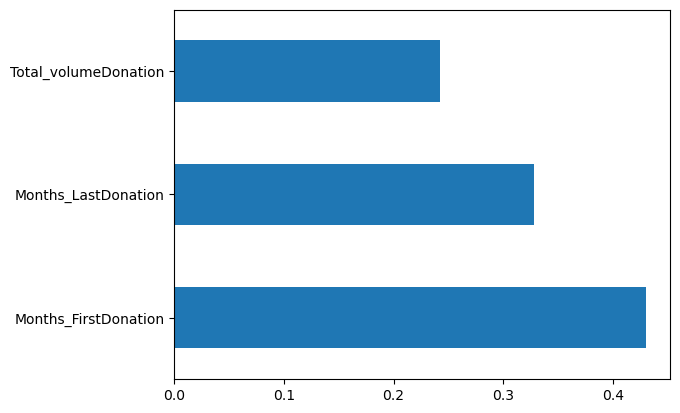

In [147]:
feat_importances = pd.Series(RF.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

## CONCLUSION

1.RandomForestClassifier model is performed well on training data with 93.5% accuracy and testing data with 73.50% accuracy 
2 xgb is second best model performed well on training data with 92.5% accuracy and testing data with 69.85% accuracy 
3.DecisionTreeClassifier model is performed well on  training data but lagging in testing data 
4.LogisticRegression is giving the less results among all the algorithms
5.The top contribution feature is Months_firsttDonation
6.From above all model we are select RandomForestClassifier beacuse it is performed very well on training as well as testing data